In [2]:
from datahandling import access_db
from data_processing_pipeline import equip_dtypes_for_scoring
from tinydb import Query
from matplotlib.pyplot import plot, figure, ylim
from model_analysis import translate_model_code
from numpy import argmax
% matplotlib inline

C:\Users\Reinhard\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
db = access_db(2, True)

In [4]:
e_d = equip_dtypes_for_scoring()

C:\Users\Reinhard\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


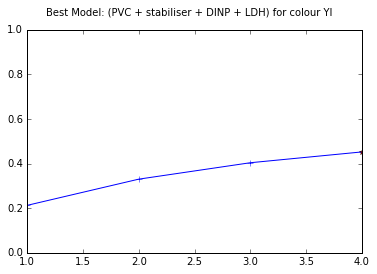

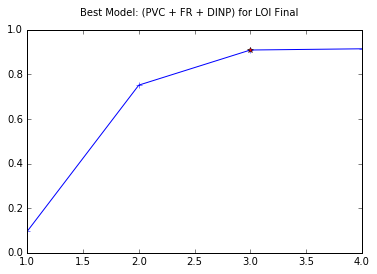

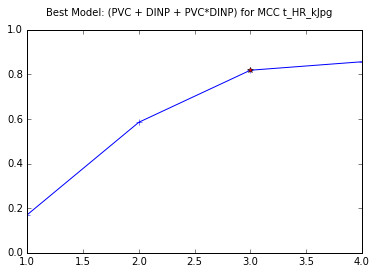

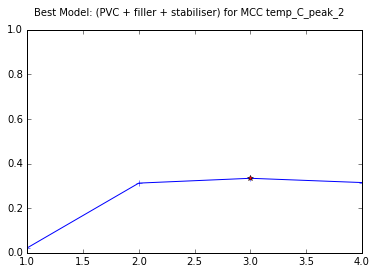

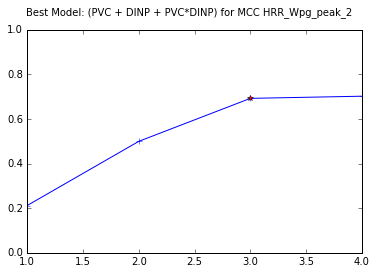

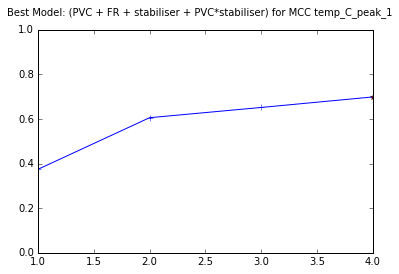

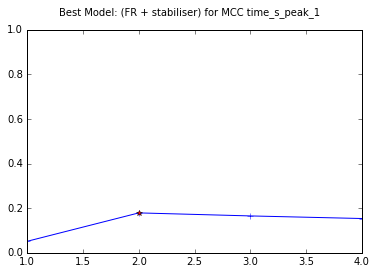

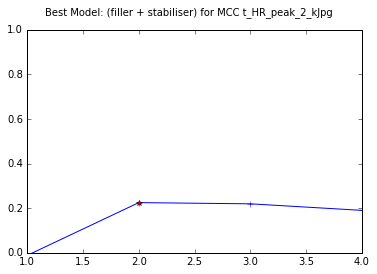

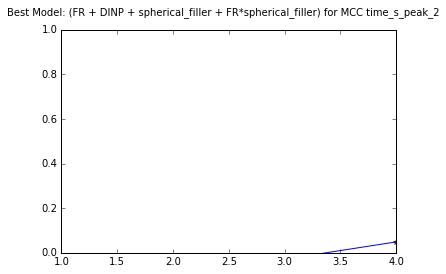

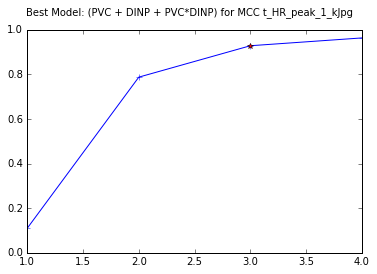

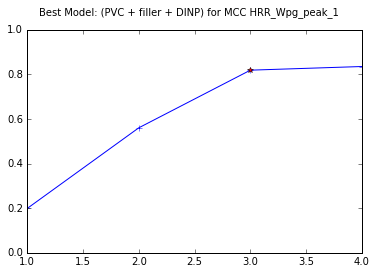

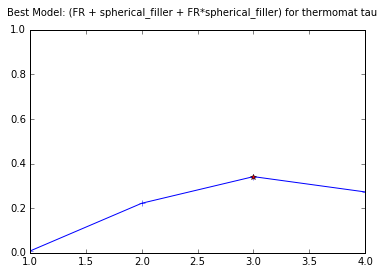

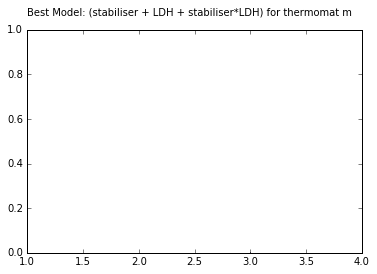

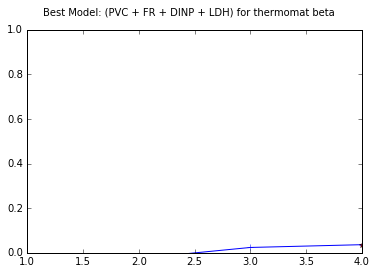

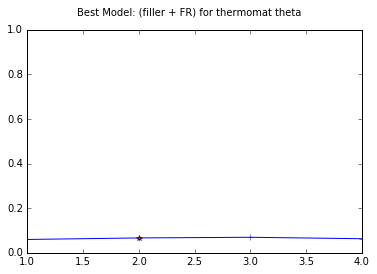

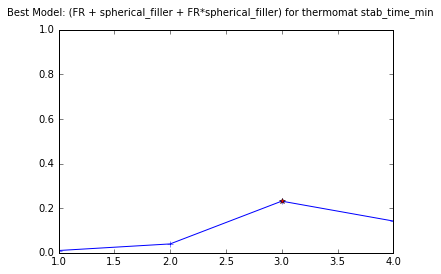

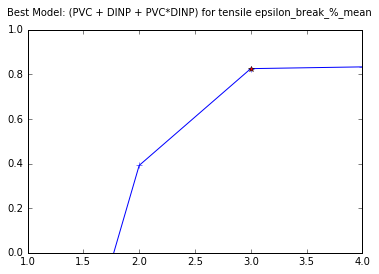

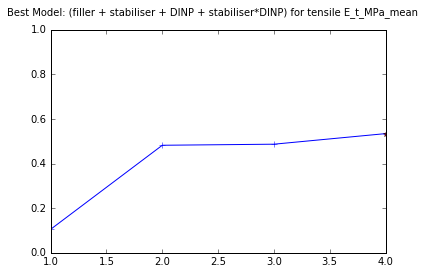

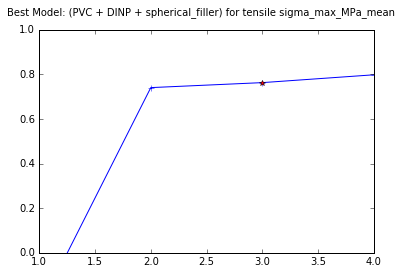

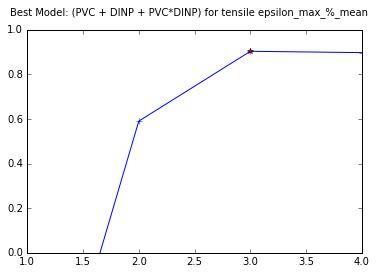

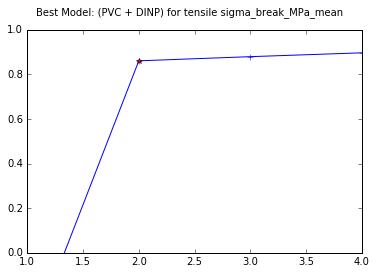

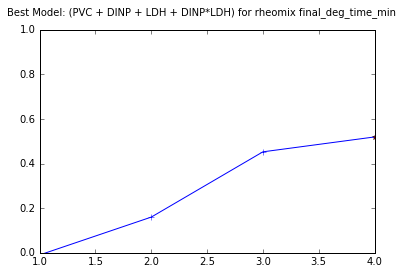

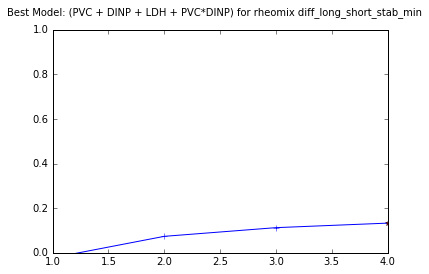

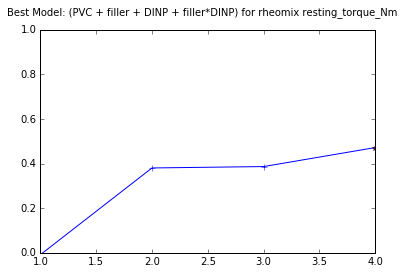

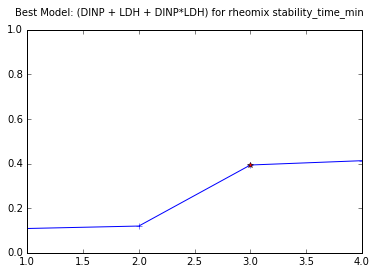

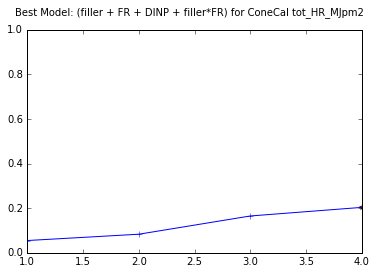

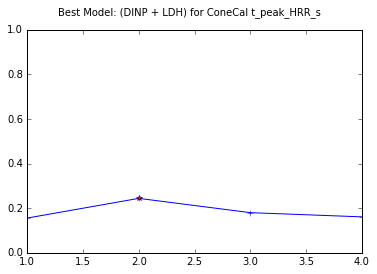

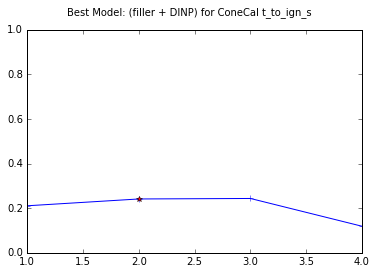

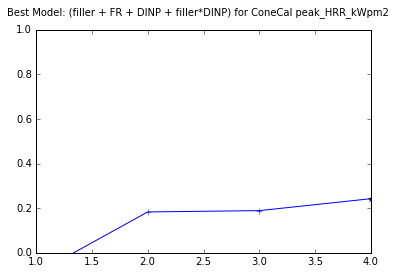

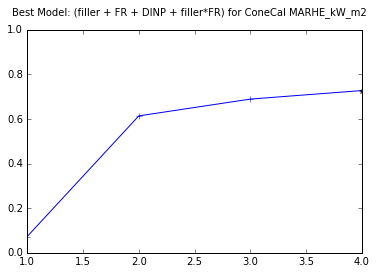

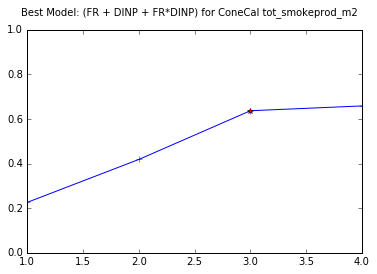

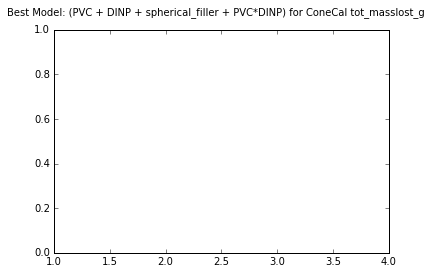

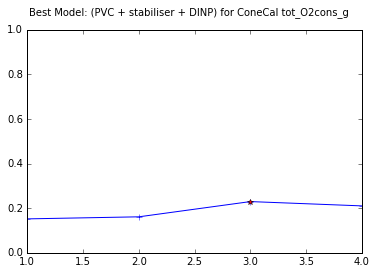

In [5]:
Q = Query()

for i in e_d:
    en, dt = i
    top_mod = db.search((Q.equipment_name == en) &
                        (Q.data_type == dt))
    
    n_terms = []
    scores = []
    mcodes = []
#     print '___________________'
#     print en, dt
#     print top_mod
    for j in top_mod:
        nt = j['n_terms']
        ts = j['top_scores'][0]
        mc = j['top_mcodes'][0]
        n_terms.append(nt)
        scores.append(ts)
        mcodes.append(mc)
#         tr_mc = translate_model_code(j['top_mcodes'][0])
#         print tr_mc, 'with a score of', round(ts, 2)

#     ind_max = argmax(scores)
#     top_score_model = mcodes[ind_max]
    
    max_score = max(scores)
#     print 'max score', max_score
    done = False
    
    lim = max_score - (abs(max_score*5/105))
#     print lim
    
    for s in scores:
#         print 's in loop', s
        if s > lim and done == False:
            select_score = s
            done = True
            
    ind = scores.index(select_score)
    top_score_model = mcodes[ind]
    
    t_mc = translate_model_code(top_score_model)
    
#     print ''
    
    
    fig = figure()
    plot(n_terms, scores, '-+')
    ylim([0.0, 1.0])
    
    plot(n_terms[ind], scores[ind], 'r*')
    
    fig.suptitle('Best Model: (' + t_mc + ') for ' + en + ' ' + dt)